In [2]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [17]:
df0 = pd.read_excel('mergeBTCdtp_LDA.xlsx',  header=0)
df0

,Row Labels,Count of Posts,Sum of Voted Score,BTC open value,BTC close value,Trend
0,2020-12-01 00:00:00,1,1.25554,19695.870000,19565.470000,0.0
1,2020-12-01 01:00:00,2,0.72744,19565.470000,19605.750000,1.0
2,2020-12-01 02:00:00,5,-0.10266,19605.750000,19680.950000,1.0
3,2020-12-01 03:00:00,5,1.40806,19680.960000,19419.740000,0.0
4,2020-12-01 04:00:00,4,2.72938,19419.730000,19354.310000,0.0
...,...,...,...,...,...,...
2696,2021-04-30 21:00:00,3,0.92586,56757.340000,56976.530000,1.0
2697,2021-04-30 22:00:00,4,3.77502,56976.530000,57119.750000,1.0
2698,2021-04-30 23:00:00,3,0.24276,57119.760000,57694.270000,1.0
2699,(blank),48,67.62984,NaN,NaN,NaN


In [20]:
kolone = ['Row Labels','Sum of Voted Score', 'BTC open value','BTC close value','Trend']
df = df0[kolone]



# popunjavamo NaN vrednosti sa prethodnikom 
# df = df.fillna(method='ffill')
# drop last n rows


#izbacujemo poslednja 2 reda 
df.drop(df.tail(2).index,inplace=True) 

#menjamo index 
df = df.set_index(pd.DatetimeIndex(df['Row Labels'].values))
del df['Row Labels']



df

C:\Users\hesh\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,Sum of Voted Score,BTC open value,BTC close value,Trend
2020-12-01 00:00:00,1.25554,19695.87,19565.47,0.0
2020-12-01 01:00:00,0.72744,19565.47,19605.75,1.0
2020-12-01 02:00:00,-0.10266,19605.75,19680.95,1.0
2020-12-01 03:00:00,1.40806,19680.96,19419.74,0.0
2020-12-01 04:00:00,2.72938,19419.73,19354.31,0.0
...,...,...,...,...
2021-04-30 19:00:00,0.00000,56857.48,57007.38,1.0
2021-04-30 20:00:00,0.17982,57007.38,56757.34,0.0
2021-04-30 21:00:00,0.92586,56757.34,56976.53,1.0
2021-04-30 22:00:00,3.77502,56976.53,57119.75,1.0


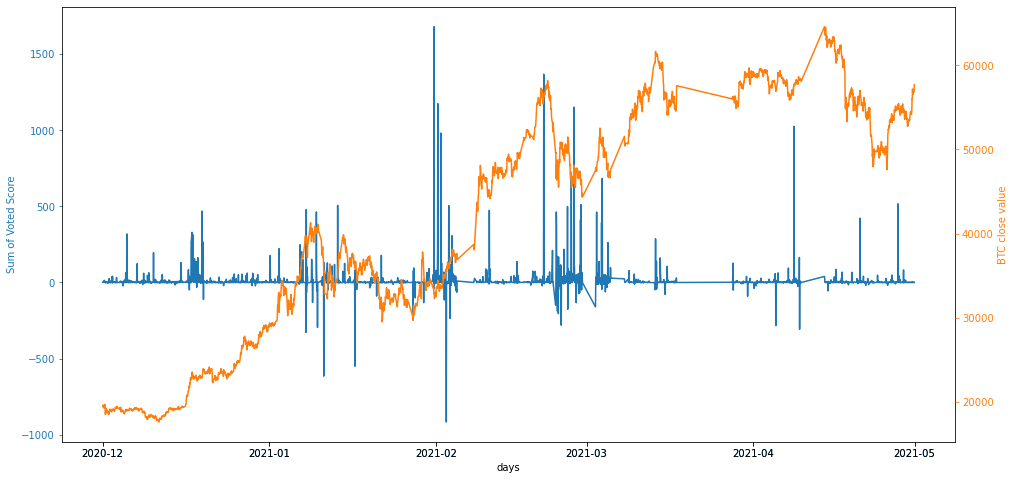

In [116]:
fig=plt.figure(figsize=(16,8))
ax=fig.add_subplot(111, label="1")
ax2=fig.add_subplot(111, label="2", frame_on=False)
ax3=fig.add_subplot(111, label="3", frame_on=False)

ax.plot(df.index, df['Sum of Voted Score'], color="C0")
ax.set_xlabel("days")
ax.set_ylabel("Sum of Voted Score", color="C0")
ax.tick_params(axis='x', colors="C0")
ax.tick_params(axis='y', colors="C0")

ax2.plot(df.index, df['BTC close value'], color="C1")
#ax2.xaxis.tick_top()
ax2.yaxis.tick_right()
#ax2.set_xlabel('days', color="C1") 
ax2.set_ylabel('BTC close value', color="C1")       
ax2.xaxis.set_label_position('top') 
ax2.yaxis.set_label_position('right') 
ax2.tick_params(axis='x')
ax2.tick_params(axis='y', colors="C1")

#ax3.plot(df.index, df['BTC close value'], color="C3")
ax3.set_xticks([])
ax3.set_yticks([])

plt.show()

In [21]:
#dataset featura
X = df
X = np.array(X.drop(['Trend'],1))
#dataset labela
y = np.array(df['Trend'])

In [103]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [104]:
#np.where(np.isnan(X))

In [105]:
model = LinearDiscriminantAnalysis().fit(x_train, y_train)

In [106]:
predikcije = model.predict(x_test)
predikcije

array([1., 0., 1., 1., 1., 1., 0., 1., 0., 0., 1., 1., 0., 0., 1., 1., 1.,
       1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 0., 1.,
       0., 0., 1., 1., 1., 1., 1., 0., 0., 1., 0., 1., 1., 0., 1., 0., 1.,
       1., 0., 0., 1., 0., 1., 1., 1., 1., 1., 0., 0., 1., 0., 1., 0., 1.,
       1., 1., 0., 1., 0., 1., 0., 0., 0., 0., 1., 1., 1., 0., 0., 1., 1.,
       1., 0., 0., 0., 0., 1., 0., 1., 1., 1., 1., 1., 0., 0., 1., 1., 0.,
       0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 1., 0., 1., 0., 1., 1.,
       1., 1., 0., 0., 1., 0., 1., 1., 1., 1., 1., 1., 0., 0., 1., 0., 0.,
       0., 1., 1., 0., 1., 0., 1., 1., 0., 0., 1., 1., 1., 1., 1., 0., 1.,
       0., 0., 1., 0., 1., 1., 0., 1., 1., 0., 1., 0., 1., 0., 0., 1., 1.,
       1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.,
       1., 0., 0., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 0., 0., 0., 1.,
       0., 0., 1., 1., 0., 1., 1., 0., 1., 0., 0., 1., 1., 1., 1., 1., 0.,
       0., 0., 1., 0., 0.

In [127]:
y_test

array([1., 0., 1., 1., 1., 1., 0., 1., 0., 0., 1., 1., 0., 0., 1., 1., 1.,
       1., 1., 1., 0., 1., 1., 0., 1., 1., 0., 1., 1., 1., 0., 1., 0., 1.,
       0., 0., 1., 1., 1., 1., 1., 0., 0., 1., 0., 1., 1., 0., 1., 0., 1.,
       1., 0., 0., 1., 0., 0., 1., 1., 0., 1., 0., 0., 1., 0., 1., 0., 1.,
       1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 1., 1., 0., 0., 1., 1.,
       1., 0., 0., 0., 0., 1., 0., 1., 1., 1., 1., 1., 0., 0., 1., 1., 0.,
       0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 1., 0., 1., 0., 1., 1.,
       1., 0., 0., 0., 1., 0., 1., 1., 1., 1., 0., 1., 0., 0., 1., 0., 0.,
       0., 1., 1., 0., 1., 0., 1., 1., 0., 0., 1., 1., 1., 1., 1., 0., 1.,
       0., 0., 1., 0., 1., 1., 0., 1., 1., 0., 1., 0., 1., 0., 0., 1., 1.,
       0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.,
       1., 0., 0., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 0., 0., 0., 1.,
       0., 0., 1., 1., 0., 1., 1., 0., 1., 0., 0., 1., 1., 1., 1., 1., 0.,
       0., 0., 0., 0., 0.

In [128]:
print(classification_report(y_test, predikcije))

              precision    recall  f1-score   support

         0.0       1.00      0.92      0.96       256
         1.0       0.93      1.00      0.96       284

    accuracy                           0.96       540
   macro avg       0.96      0.96      0.96       540
weighted avg       0.96      0.96      0.96       540



In [138]:
df_poredjenje = pd.DataFrame({'stvarna': y_test, 'predikcije': predikcije})
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
df_poredjenje


,stvarna,predikcije
0,1.0,1.0
1,0.0,0.0
2,1.0,1.0
3,1.0,1.0
4,1.0,1.0
5,1.0,1.0
6,0.0,0.0
7,1.0,1.0
8,0.0,0.0
9,0.0,0.0


In [141]:


#iteriramo da bi napravili novu kolonu tacno?
# for i in df_poredjenje.iterrows():
#     if (df_poredjenje["stvarna"][i] + df_poredjenje["predvidjanje"][i]) == (0 or 2):
#         df_poredjenje["tacno?"][i] = 1
#     else:
#         df_poredjenje["tacno?"][i] = 0
        
    
result = []
for i in df_poredjenje["stvarna"]:
    #print (df_poredjenje["stvarna"][i] , df_poredjenje["predvidjanje"][i])
    if (df_poredjenje["stvarna"][i] is df_poredjenje["predikcije"][i]) :
        result.append("0")
    else:
        result.append("1")    
    
    
df_poredjenje['tacno?'] = result
#print(df_poredjenje['stvarna'][1] ,df_poredjenje['predvidjanje'][1],df_poredjenje['tacno?'][1])
df_poredjenje.head(90)

,stvarna,predikcije,tacno?
0,1.0,1.0,1
1,0.0,0.0,1
2,1.0,1.0,1
3,1.0,1.0,1
4,1.0,1.0,1
5,1.0,1.0,1
6,0.0,0.0,1
7,1.0,1.0,1
8,0.0,0.0,1
9,0.0,0.0,1


In [142]:
df_poredjenje.loc[df_poredjenje['tacno?'] == 0]

,stvarna,predikcije,tacno?


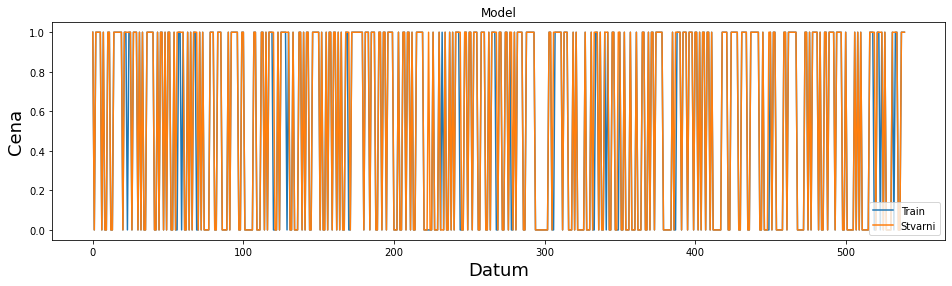

In [143]:

# visualizacija
plt.figure(figsize=(16,4))
plt.title('Model')
plt.xlabel('Datum', fontsize=18)
plt.ylabel('Cena', fontsize=18)
plt.plot(y_test)
plt.plot(predikcije)
plt.legend(['Train','Stvarni','Predikcije'], loc='lower right')